In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In this exposition, we will assume the reader is familiar with differential and integral calculus. This section will introduct Scipy's `quad` and `solve_ivp` functions.

# Integration

The gamma function $\Gamma(z)$ (which will appear frequently throughout the text) is defined as

$$\Gamma(z) = \int_{0}^{\infty} x^{z-1} e^{-x} dx $$

It can easily be proven by induction (using integration by parts) that if $z$ is a positive integer 

$$ \Gamma(z) = (z-1)!$$

We will create a custom Gamma function using Scipy's `quad` function. First we will import the function.

In [2]:
from scipy.integrate import quad

This function takes in a lot of parameters, most of which are optional. The full documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html). The most important inputs are the first one (the function we are integrating), the second one (the lower integration bound), and the third one (the upper integration bound). Let's try defining our custom gamma function.

In [3]:
def custom_gamma(z):
    integrand = lambda x: x**(z-1) * np.exp(-x)
    return quad(integrand, 0, np.inf)

custom_gamma(4)

(6.0, 2.9915229077545863e-09)

The first output is the estimated value and the second output is the estimated absolute error. As expected we get $\Gamma(4) = 3! = 6$.

We will never actually need to use this custom made gamma, this was meant only as a toy example of using the `quad` function. Instead we can use Scipy's built in gamma function shown below

In [4]:
from scipy.special import gamma
gamma(4)

6.0

# Differential Equations

Next we will demonstrate how to solve initial value problems using the `solve_ivp` function. First let's import it into our environment.

In [5]:
from scipy.integrate import solve_ivp

Again this function has a lot of optional parameters. The full documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp). Given a function $f$, an interval $(t_0, t_f)$, and a value $y_0$ the function finds a solution to 

$$\frac{dy}{dt} = f(t,y)$$

where

$$y(t_0) = y_0$$

Note both $y$ and $y_0$ can be a single value or a vector (for solving system of differential equations). We will demonstrate how to use this function with estimating the Airy function

The Airy function, denoted $\text{Ai}(x)$, is the solution to the following differential equation

$$\frac{d^2 y}{dt^2} = yt$$

where 

$$\text{Ai}(0) = \frac{1}{3^{\frac{2}{3}} \Gamma\left(\frac{2}{3}\right)} \ , \ \text{Ai}'(0) = \frac{-1}{3^{\frac{1}{3}} \Gamma\left(\frac{1}{3}\right)} $$


This is a second order differential equation but the `solve_ivp` function is for first order equations. In order to approximate the Airy function, we will need to convert this to a system of differential equations. Define $y$ as

$$ y = \begin{pmatrix}
 \text{Ai}\\
\text{Ai}'
\end{pmatrix} $$

The differential equation can be written as

$$\frac{dy}{dt} = \begin{pmatrix}
 \text{Ai}'\\
 \text{Ai} \cdot t
\end{pmatrix} $$

Let's create the function that we will pass into the ODE solver. The function will take in the variable $t$ and the vector $y$ defined above. The function should return the derivative $\frac{dy}{dt}$ as an array.

In [6]:
def airy_function(t,y):
    return np.array([y[1], t*y[0]])

Compute our initial conditions

In [7]:
Ai0 = 1/(3**(2/3)*gamma(2/3))
dAi_dt0 = -1/(3**(1/3)*gamma(1/3))
y0 = np.array([Ai0, dAi_dt0])

Suppose we are interested in approximating in the positive direction from $t=0$ to $t=7$ and in the negative direction from $t=0$ to $t=-15$.

In [8]:
t_interval_pos = (0,7)
t_interval_neg = (0, -15)

We can now pass our variables into the function

In [9]:
airy_sol_pos = solve_ivp(airy_function, t_interval_pos, y0, max_step=.01)
airy_sol_neg = solve_ivp(airy_function, t_interval_neg, y0, max_step=.01)

The function returns an object with $t$ values and corresponding values for $y(t)$. The first element of $y(t)$ will correspond to $\text{Ai}(t)$ and the second element to $\text{Ai}'(t)$.

In [10]:
airy_sol_pos.t[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [11]:
airy_sol_pos.y[:10]

array([[ 3.55028054e-01,  3.52439919e-01,  3.49852136e-01, ...,
         7.69554270e-07,  7.49208183e-07,  7.49208183e-07],
       [-2.58819404e-01, -2.58801739e-01, -2.58749088e-01, ...,
        -2.06127861e-06, -2.00816316e-06, -2.00816316e-06]])

We can now plot the $\text{Ai}$ and $\text{Ai}'$ from $(-15,7)$

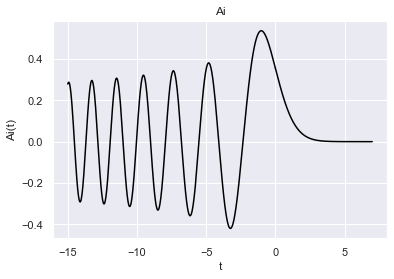

In [12]:
plt.xlabel("t")
plt.ylabel("Ai(t)")
plt.title("Ai")
plt.plot(airy_sol_neg.t, airy_sol_neg.y[0], c='black')
plt.plot(airy_sol_pos.t, airy_sol_pos.y[0], c='black');

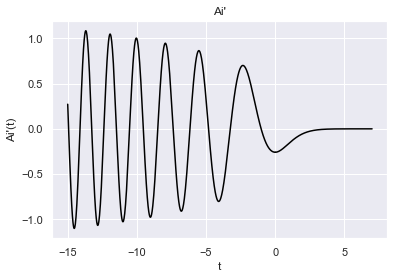

In [13]:
plt.xlabel("t")
plt.ylabel("Ai'(t)")
plt.title("Ai'")
plt.plot(airy_sol_neg.t, airy_sol_neg.y[1], c='black')
plt.plot(airy_sol_pos.t, airy_sol_pos.y[1], c='black');

When working with the Airy function in the future, we will actually use Scipy, which has a built in Airy function. The `airy` function returns $\text{Ai}$ and $\text{Ai}'$. We plot both functions below and see they match our solutions

In [14]:
from scipy.special import airy

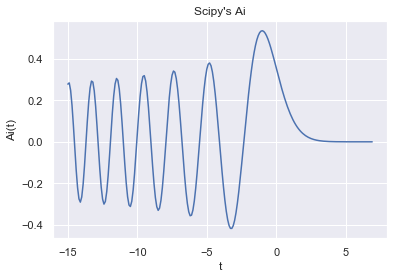

In [15]:
t_axis = np.arange(-15, 7, .1)
plt.xlabel("t")
plt.ylabel("Ai(t)")
plt.title("Scipy's Ai")
plt.plot(t_axis, (lambda x: airy(x)[0])(t_axis));

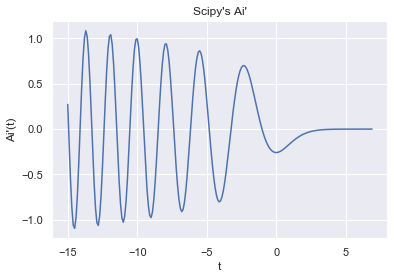

In [16]:
x_axis = np.arange(-15, 7, .1)
plt.xlabel("t")
plt.ylabel("Ai'(t)")
plt.title("Scipy's Ai'")
plt.plot(t_axis, (lambda x: airy(x)[1])(t_axis));